# Predicting Diabetes using k-Nearest Nieghbor, Random Forest, and Naive Bayes classification algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Modules imported")

Modules imported


In [2]:
data = pd.read_csv(os.getcwd()+'/data/diabetes.csv')

##### Diabetes data for female patients at least 21 years old of Pima Indian heritage

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


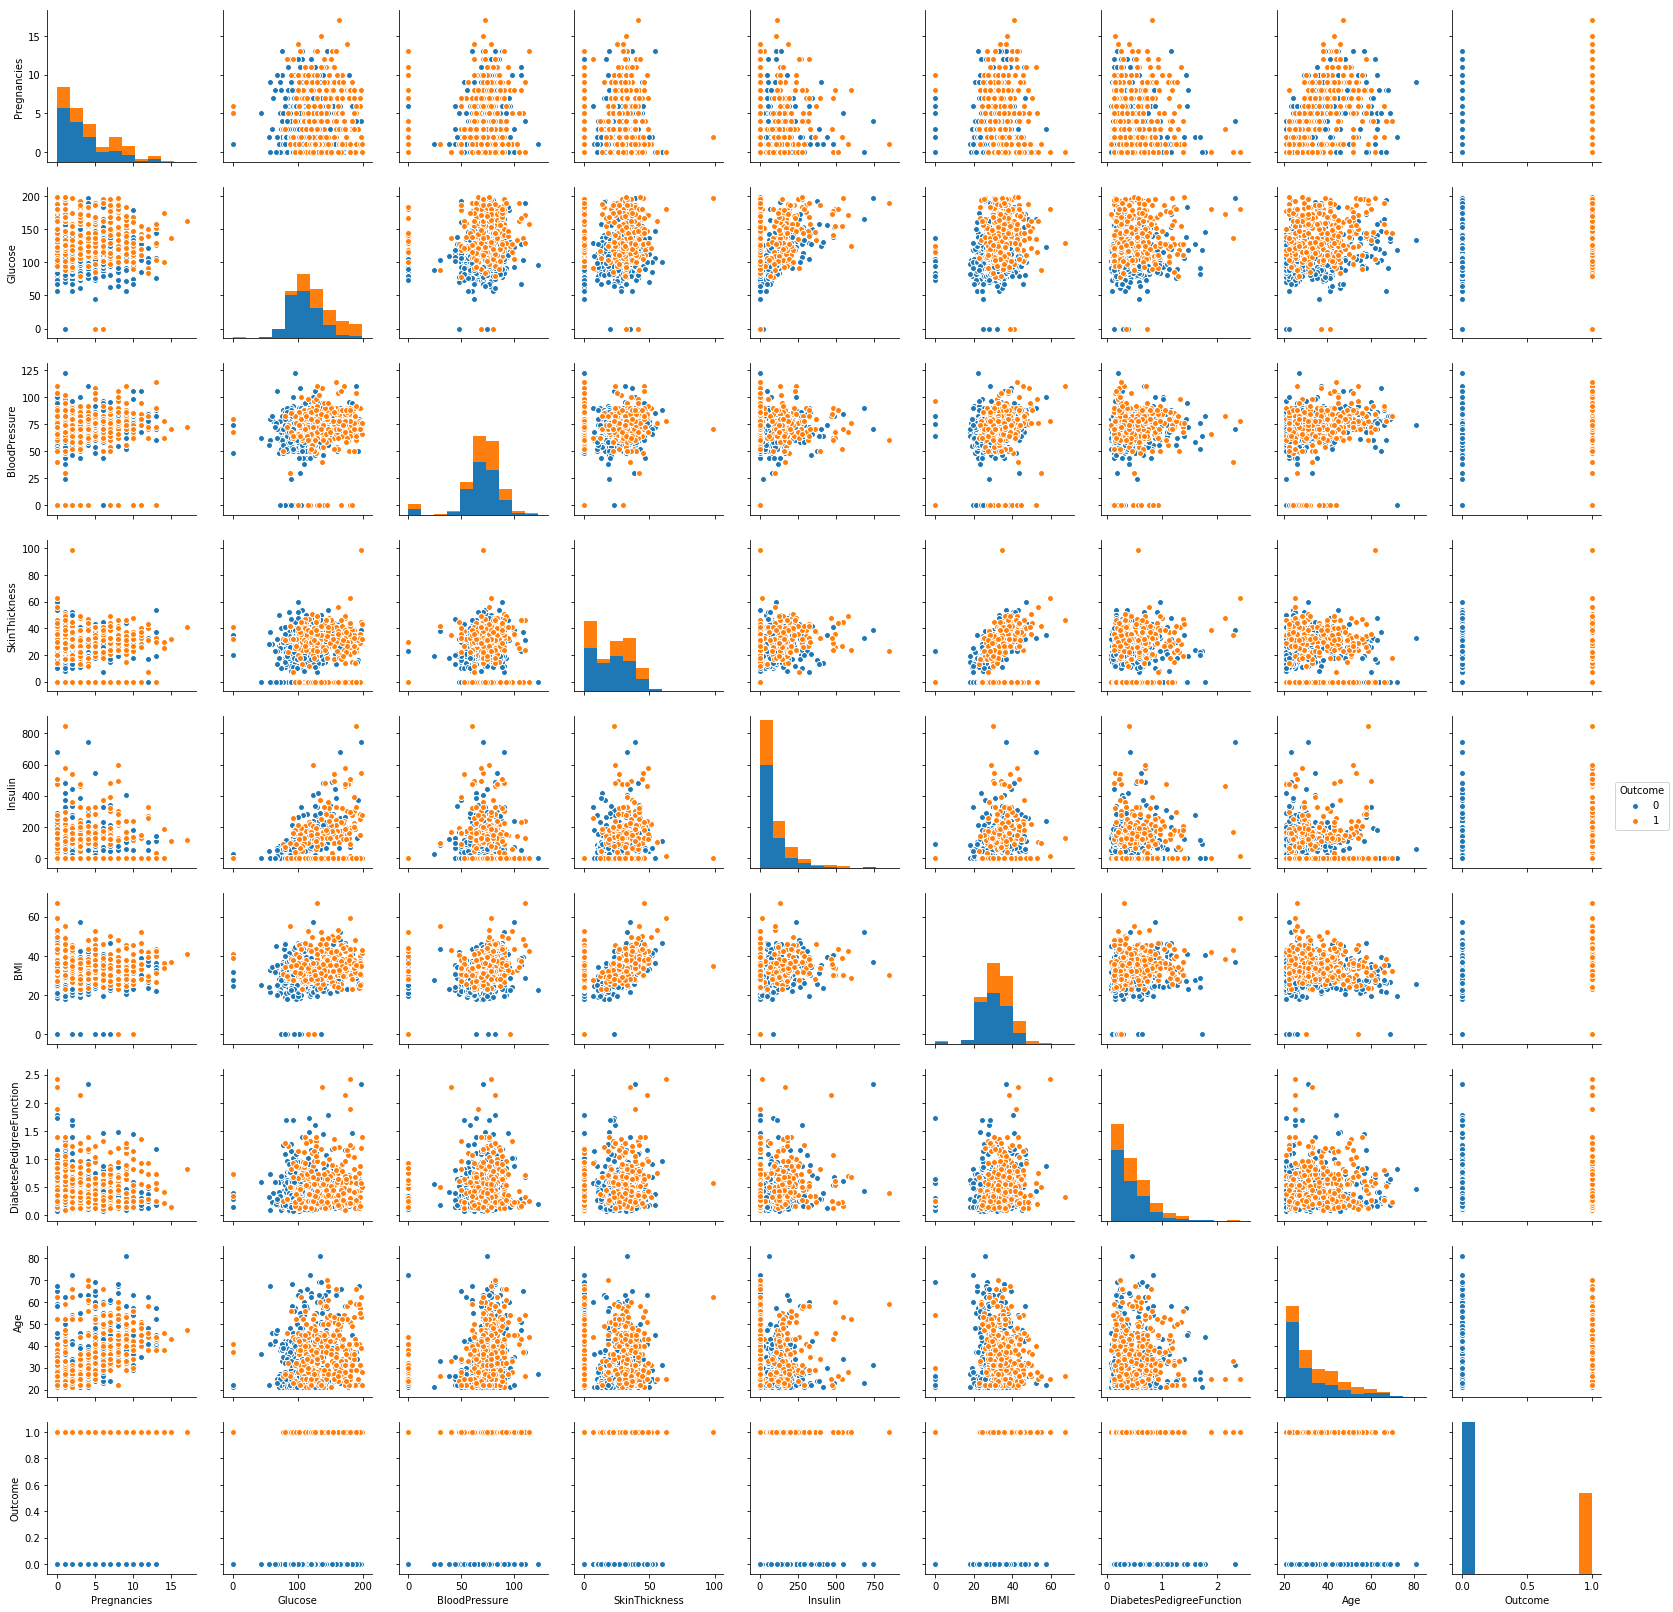

In [5]:
sns.pairplot(data, hue = 'Outcome')

### Removing zero values that don't make sense

Want to remove entries that have 0  for variables Glucose, Blo
od Pressure, Skin Thickness, Insulin, and BMI


In [6]:
data.drop(data[data.Glucose == 0].index, inplace=True)
data.drop(data[data.BloodPressure == 0].index, inplace=True)
data.drop(data[data.SkinThickness == 0].index, inplace=True)
data.drop(data[data.Insulin == 0].index, inplace=True)
data.drop(data[data.BMI == 0].index, inplace=True)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Went from 768 entries to 392.  Will proceed with this dataset.  Other option is to impute the the missing data

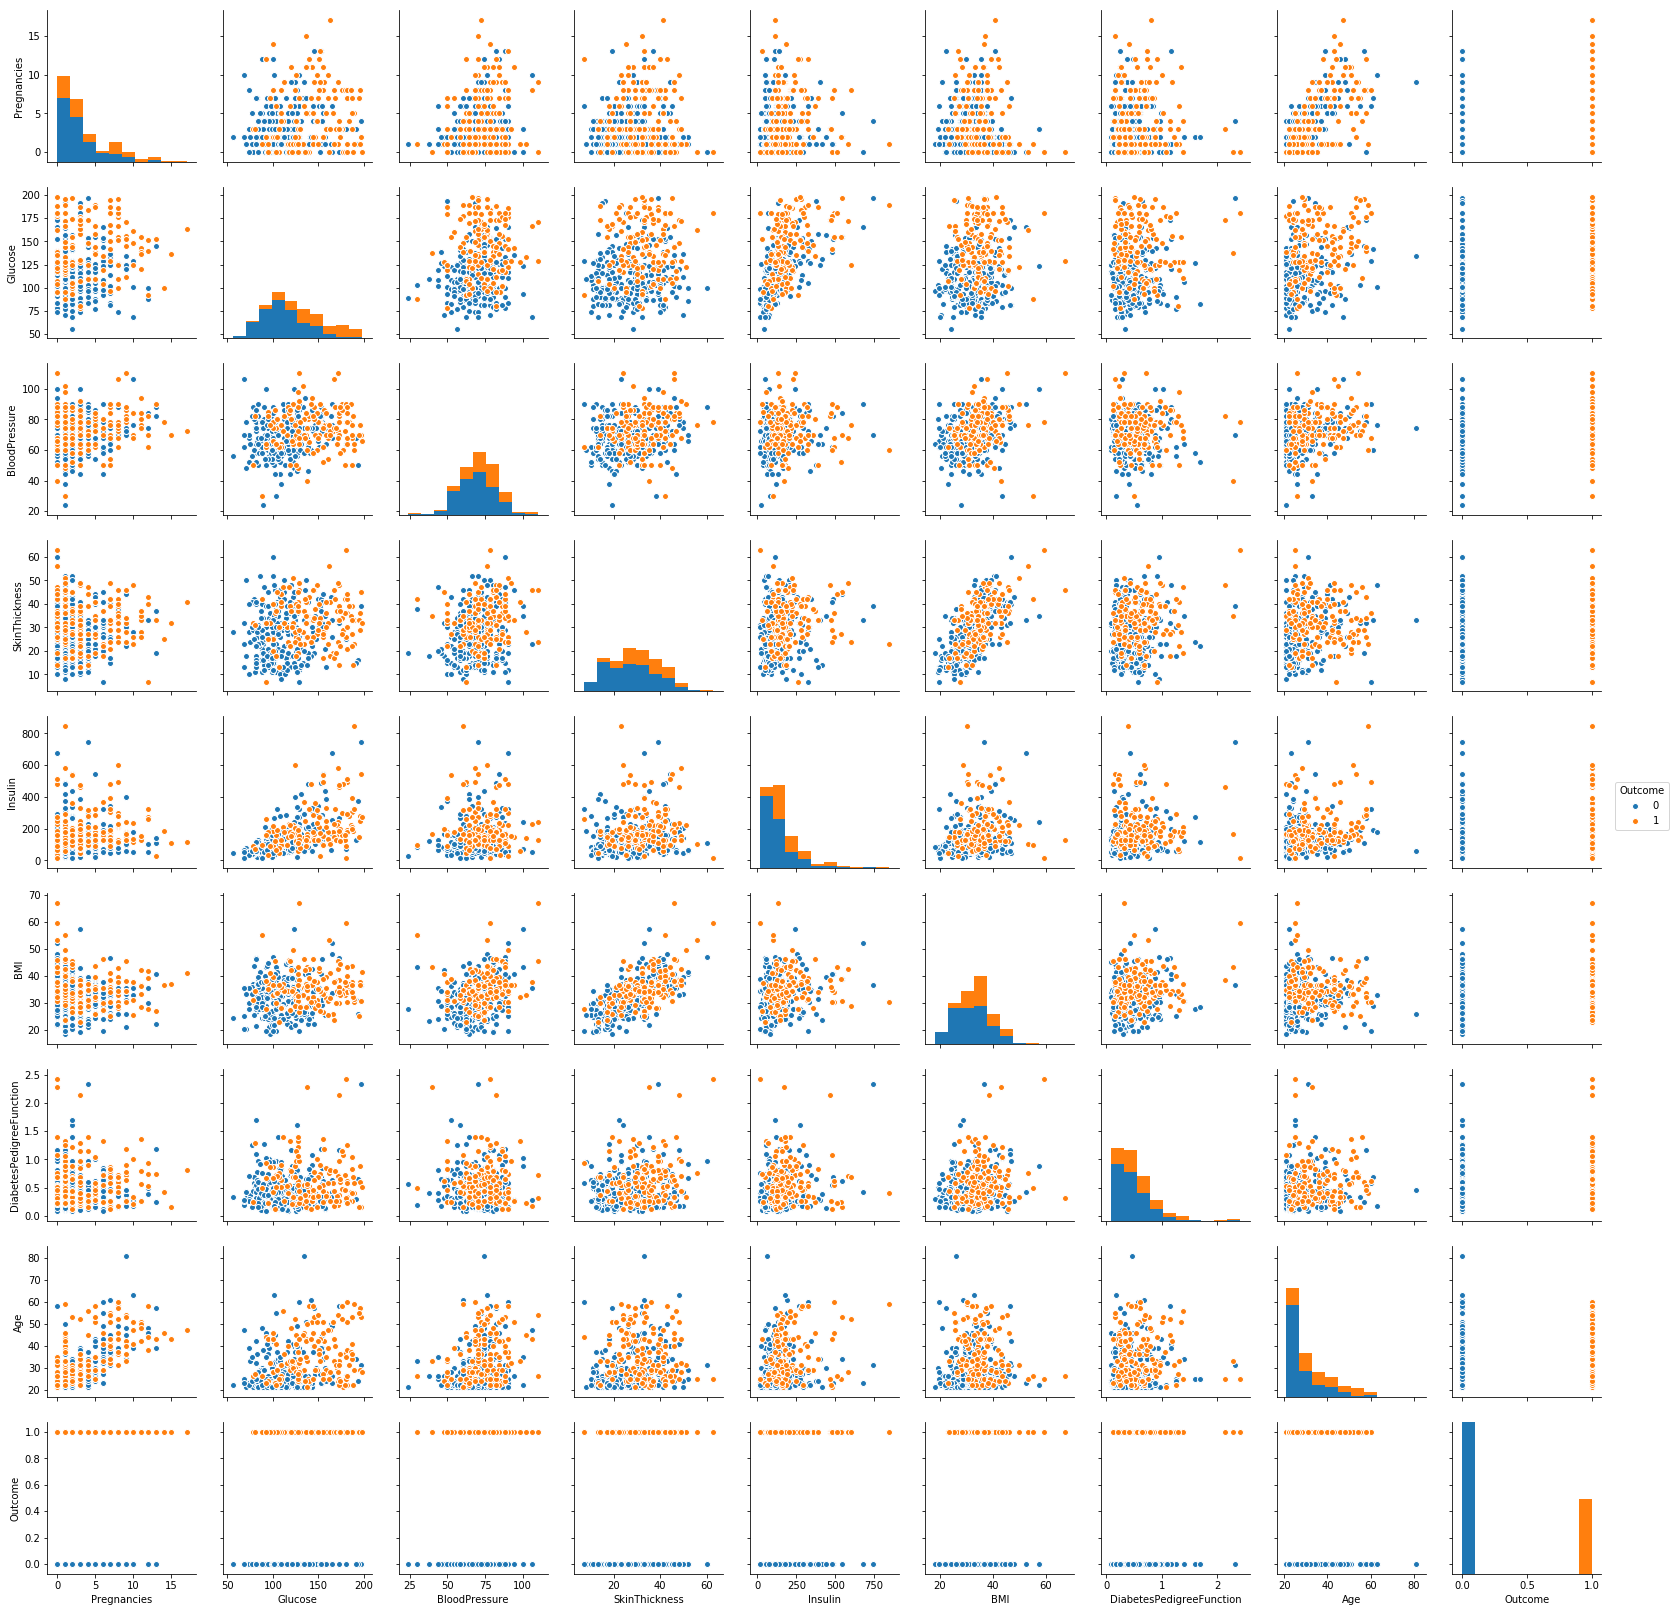

In [7]:
sns.pairplot(data, hue = 'Outcome')

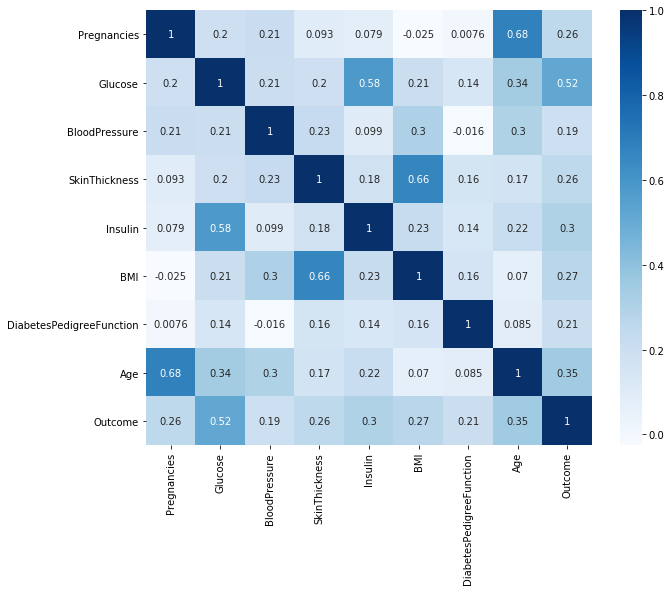

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

##### Some interesting correlations

Age highly correlated with number of pregnancies

Diabetes correlated most to Glucose, followed by Age

Skin thickness strongly correlated to insulin and BMI -- more fat more skin!

Blood pressure is just as correlated to age as BMI

#### Scaling the data before input into classifier

In [9]:
from sklearn.preprocessing import StandardScaler

features = data.drop(columns='Outcome')
features.head()

scaler = StandardScaler()

scaled_features = pd.DataFrame(scaler.fit_transform(features),
    columns=['Pregnancies',
            'Glucose',
            'BlooodPressure',
            'SkinThickness',
            'Insulin',
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']
)
scaled_features.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pregnancies,Glucose,BlooodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


In [10]:
labels = data.Outcome

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=1/3)

In [12]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,3.409962,123.065134,71.716475,29.229885,161.459770,33.426437,0.533245,31.340996
std,3.335782,30.926581,12.504310,10.496924,120.803668,6.995374,0.373087,10.459933
min,0.000000,68.000000,30.000000,10.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,64.000000,21.000000,78.000000,28.700000,0.267000,24.000000
50%,2.000000,120.000000,72.000000,30.000000,130.000000,33.300000,0.452000,28.000000
75%,5.000000,143.000000,80.000000,37.000000,196.000000,37.500000,0.687000,37.000000
max,17.000000,198.000000,110.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [13]:
X_test.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,3.083969,121.755725,68.564885,28.977099,145.290076,32.408397,0.502725,29.916031
std,2.948372,30.829080,12.258811,10.593514,114.526012,7.069512,0.282827,9.632508
min,0.000000,56.000000,24.000000,7.000000,16.000000,19.300000,0.107000,21.000000
25%,1.000000,98.500000,60.000000,22.000000,75.000000,27.500000,0.282500,23.000000
50%,2.000000,119.000000,70.000000,28.000000,120.000000,32.500000,0.446000,26.000000
75%,4.000000,144.000000,76.000000,35.500000,175.500000,36.250000,0.677500,34.000000
max,13.000000,191.000000,106.000000,60.000000,846.000000,57.300000,1.699000,60.000000


### Now ready to feed into KNN classifier

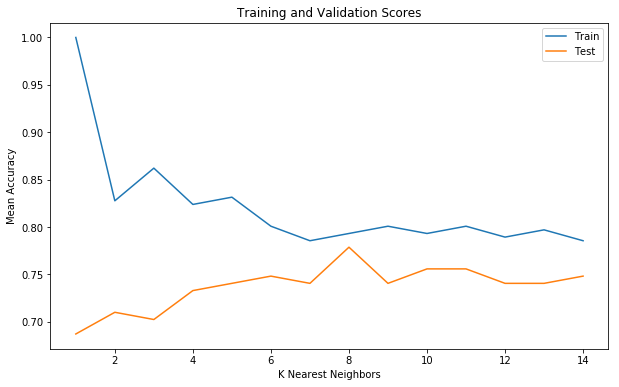

In [14]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores =[]
for k in range(1,15): #number of neighbors
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,len(train_scores)+1),train_scores)
plt.plot(range(1,len(test_scores)+1),test_scores)
plt.title('Training and Validation Scores')
plt.ylabel('Mean Accuracy')
plt.xlabel('K Nearest Neighbors')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

In [15]:
def assess_classifier(X_test,y_test,classifier):
    
    #Making Confusion Matrix
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cm, cmap="Blues", annot=True)
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
    print(classification_report(y_test,y_pred))
    
    #Making ROC
    y_pred_probabilities = classifier.predict_proba(X_test)[:,1]
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test,y_pred_probabilities)

    plt.figure(figsize=(7,7))
    plt.plot(false_pos_rate,true_pos_rate,label='Classifier')
    plt.plot([0,1],[0,1],'k--',label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.show()
    
    auc = roc_auc_score(y_test, y_pred_probabilities)

    print("Area Under ROC curve: ", auc)
    

### Building the model with 8 nearest neighbors

In [16]:
knn = KNeighborsClassifier(8)

knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.7786259541984732

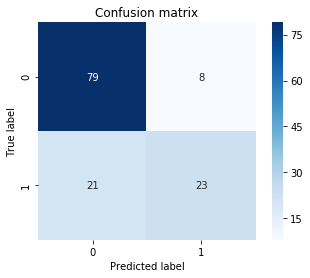

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        87
           1       0.74      0.52      0.61        44

   micro avg       0.78      0.78      0.78       131
   macro avg       0.77      0.72      0.73       131
weighted avg       0.77      0.78      0.77       131



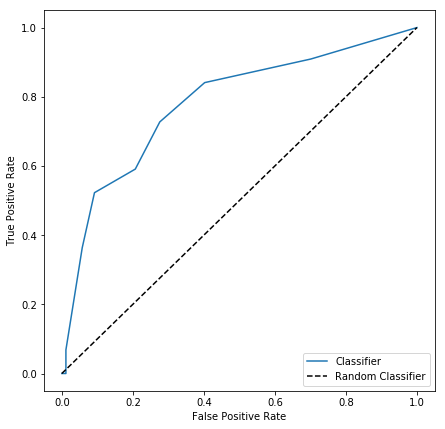

Area Under ROC curve:  0.7805642633228841


In [17]:
assess_classifier(X_test,y_test,knn)

## Model Assessment

The model was correct 70% of the time when predicting diabetes (precision), but only correctly predicted 55% of all diabetes cases (recall)

79% of the time, the higher probability prediction of the knn-classifier was the correct choice (AUC)


## How does this compare to a Random Forest Classifier?

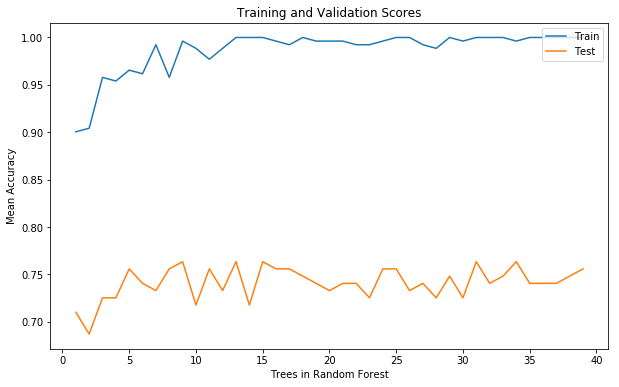

0.7175572519083969

In [18]:
from sklearn.ensemble import RandomForestClassifier

test_scores = []
train_scores =[]
for k in range(1,40): #number of trees
    RFC = RandomForestClassifier(k)
    RFC.fit(X_train, y_train)
    
    train_scores.append(RFC.score(X_train, y_train))
    test_scores.append(RFC.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,len(train_scores)+1),train_scores)
plt.plot(range(1,len(test_scores)+1),test_scores)
plt.title('Training and Validation Scores')
plt.ylabel('Mean Accuracy')
plt.xlabel('Trees in Random Forest')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

RFC = RandomForestClassifier(n_estimators=10,criterion='gini')
RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

In [19]:
RFC = RandomForestClassifier(n_estimators=15,criterion='gini')
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

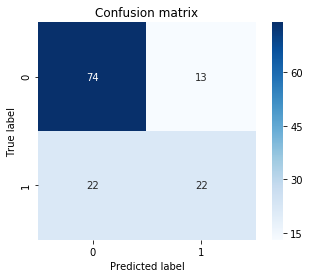

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        87
           1       0.63      0.50      0.56        44

   micro avg       0.73      0.73      0.73       131
   macro avg       0.70      0.68      0.68       131
weighted avg       0.72      0.73      0.72       131



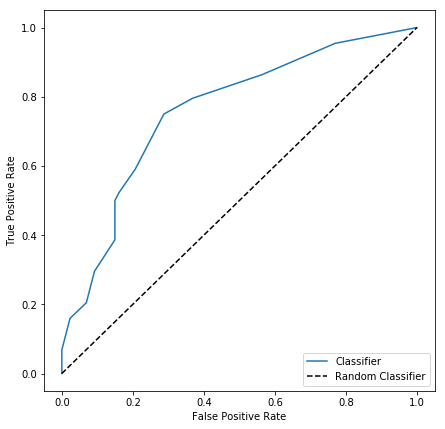

Area Under ROC curve:  0.7587513061650992


In [20]:
assess_classifier(X_test,y_test,RFC)

## Model Assessment

The model was correct 65% of the time when predicting diabetes (precision), but only correctly predicted 57% of all diabetes cases (recall)

87% of the time, the higher probability prediction of the random forest classifier was the correct choice (AUC)


## Random Forest feature importance

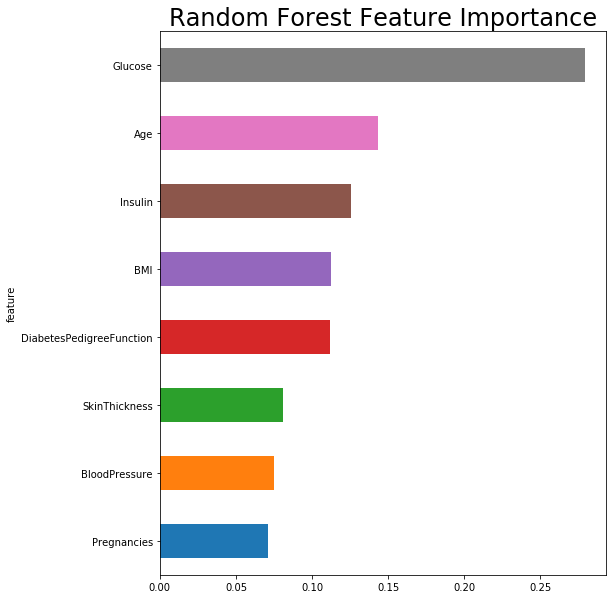

In [21]:
#Creating dataframe of feature importance
df_importance = pd.DataFrame(features.columns, columns=['feature'])
df_importance['fscore'] = RFC.feature_importances_

#Plotting feature importance
df_importance.sort_values('fscore',ascending=True,inplace=True)
df_importance.plot(kind='barh',x='feature',y='fscore',legend=False,figsize=(8,10))
plt.title("Random Forest Feature Importance", fontsize=24)
# plt.xticks([],[])
plt.show()

## Now trying Naive Bayes classification algorithms

#### Gaussian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)
nb_classifier.score(X_test,y_test)

0.732824427480916

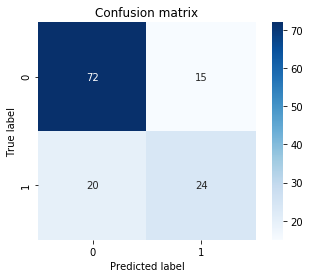

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        87
           1       0.62      0.55      0.58        44

   micro avg       0.73      0.73      0.73       131
   macro avg       0.70      0.69      0.69       131
weighted avg       0.73      0.73      0.73       131



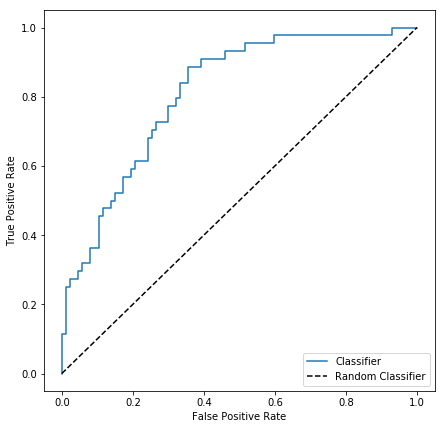

Area Under ROC curve:  0.8100835945663531


In [23]:
assess_classifier(X_test,y_test,nb_classifier)

#### Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)
nb_classifier.score(X_test,y_test)

0.6412213740458015

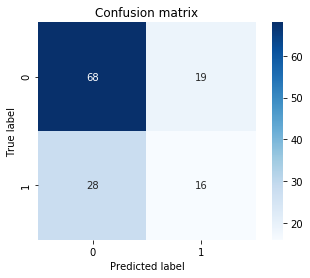

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        87
           1       0.46      0.36      0.41        44

   micro avg       0.64      0.64      0.64       131
   macro avg       0.58      0.57      0.57       131
weighted avg       0.62      0.64      0.63       131



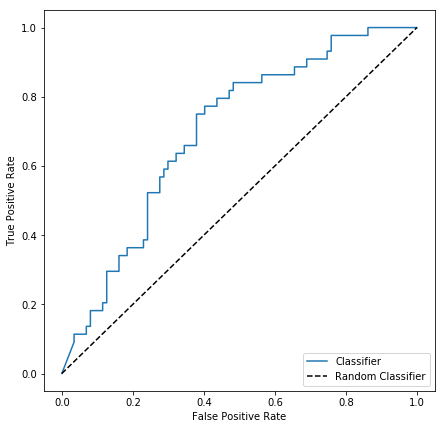

Area Under ROC curve:  0.6980146290491118


In [25]:
assess_classifier(X_test,y_test,nb_classifier)

#### ComplementNB

In [26]:
from sklearn.naive_bayes import ComplementNB

nb_classifier = ComplementNB()
nb_classifier.fit(X_train,y_train)
nb_classifier.score(X_test,y_test)

0.648854961832061

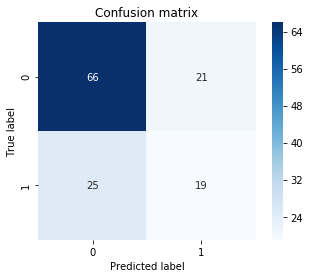

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        87
           1       0.47      0.43      0.45        44

   micro avg       0.65      0.65      0.65       131
   macro avg       0.60      0.60      0.60       131
weighted avg       0.64      0.65      0.64       131



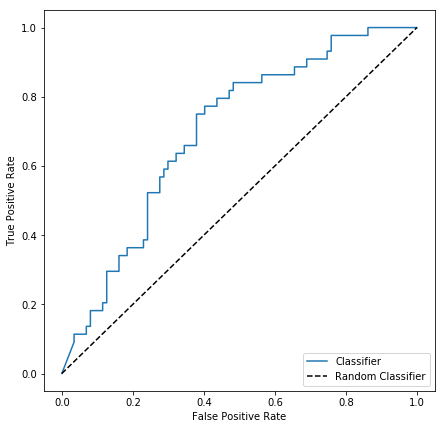

Area Under ROC curve:  0.6980146290491118


In [27]:
assess_classifier(X_test,y_test,nb_classifier)

## Model Assessment

Gaussian Naive Bayes algorithm was the best of the default Naive Bayes classifiers with performance similar to the knn and 

This model was correct 73% of the time when predicting diabetes (precision), but only correctly predicted 61% of all diabetes cases (recall)

85% of the time, the higher probability prediction of the random forest classifier was the correct choice (AUC)


## Final Thoughts 

Relatively little difference between the k nearest neighbor, random forest, and naive bayes algorithms is seen, demonstrated by the f1 scores of .55, .69, and .67, respectively, with the edge going to the random forest algorithm.